# KNN

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
#Load data
data = pd.read_csv(r"C:\Users\irola\Desktop\Dataset2\dataset-7ms.csv")

In [3]:
#Split dataset in features and target variable
feature_cols = ['ABack_x', 'ABack_y', 'ABack_z', 'ANeck_x', 'ANeck_y', 'ANeck_z', 'GBack_x', 'GBack_y', 'GBack_z', 'GNeck_x', 'GNeck_y', 'GNeck_z']
X = data[feature_cols] # Features
y = data['Behavior'] # Target variable

In [4]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [5]:
#
param_grid = [{'n_neighbors': [3,5,7],
         'weights': ['uniform', 'distance']}]
knn_class = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn_class, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [6]:
#Best model
final_model = grid_search.best_estimator_
final_model

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [6]:
#Knn Classifier
knn = KNeighborsClassifier(n_neighbors = 7, weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [7]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy", accuracy)

Accuracy 0.6451723178132062


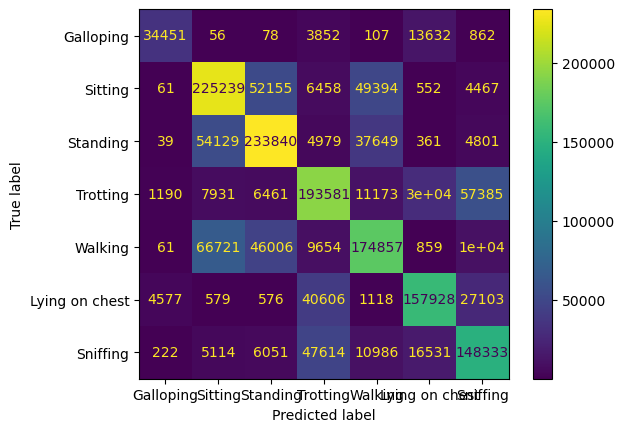

              precision    recall  f1-score   support

   Galloping       0.85      0.65      0.74     53038
 Lying chest       0.63      0.67      0.65    338326
     Sitting       0.68      0.70      0.69    335798
    Sniffing       0.63      0.63      0.63    307886
    Standing       0.61      0.57      0.59    308338
    Trotting       0.72      0.68      0.70    232487
     Walking       0.59      0.63      0.61    234851

    accuracy                           0.65   1810724
   macro avg       0.67      0.65      0.66   1810724
weighted avg       0.65      0.65      0.65   1810724



In [8]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Galloping', 'Sitting', 'Standing', 'Trotting', 'Walking','Lying on chest', 'Sniffing'])
disp.plot()
plt.show()
print(classification_report(y_test, y_pred))